In [1]:
import os
import tweepy as tw
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import re
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
df = pd.read_csv('/content/sanwoolu_twitter_data.csv')
df.head(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,ajokebaseerah,2023-01-01 23:01:57+00:00,0,Twitter for Android,@Akmediaconcept Thank you SanwoOlu for the goo...
1,1,CokerGrace4,2023-01-01 22:27:27+00:00,2,Twitter for iPhone,@tomakinta @officialABAT @OfficialAPCNg @Sanwo...
2,2,QudusIbrahim33,2023-01-01 21:42:20+00:00,3,Twitter for Android,@tomakinta @officialABAT @OfficialAPCNg @Sanwo...
3,3,Zedd_Ola27,2023-01-01 21:27:20+00:00,20,Twitter for Android,"At Alibaba's January 1st Concert 2023, for the..."
4,4,tomakinta,2023-01-01 21:13:36+00:00,22,Twitter Web App,Dedicated to those still doubting..... @offici...


In [4]:
tweets = df.iloc[:, -1].values

In [7]:
tweets

array(["@Akmediaconcept Thank you SanwoOlu for the good work, I can't wait to vote you again &amp; again. (Mega city)",
       '@tomakinta @officialABAT @OfficialAPCNg @Sanwoolu_Hamzat @jidesanwoolu JANDOR is taking over. #vote4jandor',
       '@tomakinta @officialABAT @OfficialAPCNg @Sanwoolu_Hamzat @jidesanwoolu #vote4jandon',
       ...,
       'And some people call sanwoolu their governor now after what happened 2years ago!!! God will judge all of you! Ha',
       'After all you suffered in Lagos, in the last 4 years, police brutality, clamp downs, double taxation, extortion, agberos, unending traffic, flood, traffic robberies, #EndSARS, #LekkiMassacre, no light, water.\nYou pay for everything. if you vote Jide SanwoOlu, you be MUMU.',
       '@sosaczn @JajaPhD Say the same thing if this was done by SanwoOlu'],
      dtype=object)

In [5]:
processed_tweets = []

for sentence in range(0, len(tweets)):
    # Remove all the special characters.
    processed_tweet = re.sub(r'\W', ' ', str(tweets[sentence]))

    # Remove all single characters as a result of removing the special characters.
    processed_tweet= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start.
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Replace multiple spaces with a single space.
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Remove links from text.
    processed_tweet = re.sub(r'http\S+', '', processed_tweet)

    # Remove prefixed 'b'.
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    processed_tweets.append(processed_tweet)

In [8]:
clean_tweets = pd.DataFrame({'tweet': processed_tweets})
clean_tweets.head(5)

,tweet
0,Akmediaconcept Thank you SanwoOlu for the goo...
1,tomakinta officialABAT OfficialAPCNg Sanwoolu...
2,tomakinta officialABAT OfficialAPCNg Sanwoolu...
3,At Alibaba January 1st Concert 2023 for the be...
4,Dedicated to those still doubting officialABAT...


In [9]:
vader = SentimentIntensityAnalyzer()

function = lambda title: vader.polarity_scores(title)['compound']
clean_tweets['compound'] = clean_tweets['tweet'].apply(function)
clean_tweets

,tweet,compound
0,Akmediaconcept Thank you SanwoOlu for the goo...,0.6597
1,tomakinta officialABAT OfficialAPCNg Sanwoolu...,0.0000
2,tomakinta officialABAT OfficialAPCNg Sanwoolu...,0.0000
3,At Alibaba January 1st Concert 2023 for the be...,0.7717
4,Dedicated to those still doubting officialABAT...,0.1531
...,...,...
4996,CryptoQwueen realboyastro AJ_Alahji MobilePun...,-0.1027
4997,channelstv Sanwoolu is total failure and he i...,-0.6124
4998,And some people call sanwoolu their governor n...,0.5423
4999,After all you suffered in Lagos in the last 4 ...,-0.8689


In [11]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

clean_tweets['sentiment'] = clean_tweets['compound'].apply(getAnalysis)
clean_tweets

,tweet,compound,sentiment
0,Akmediaconcept Thank you SanwoOlu for the goo...,0.6597,Positive
1,tomakinta officialABAT OfficialAPCNg Sanwoolu...,0.0000,Neutral
2,tomakinta officialABAT OfficialAPCNg Sanwoolu...,0.0000,Neutral
3,At Alibaba January 1st Concert 2023 for the be...,0.7717,Positive
4,Dedicated to those still doubting officialABAT...,0.1531,Positive
...,...,...,...
4996,CryptoQwueen realboyastro AJ_Alahji MobilePun...,-0.1027,Negative
4997,channelstv Sanwoolu is total failure and he i...,-0.6124,Negative
4998,And some people call sanwoolu their governor n...,0.5423,Positive
4999,After all you suffered in Lagos in the last 4 ...,-0.8689,Negative


In [12]:
clean_tweets['sentiment'].value_counts()

Positive    2359
Negative    1430
Neutral     1212
Name: sentiment, dtype: int64

Text(0, 0.5, 'sanwoolu Sentiment')

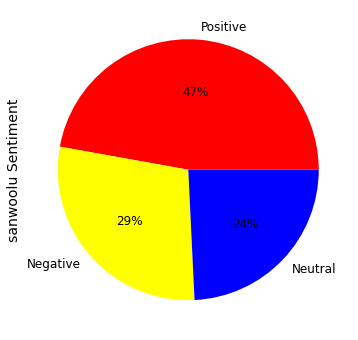

In [16]:
clean_tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["red", "yellow", "blue"])
plt.ylabel("sanwoolu Sentiment", size=14)

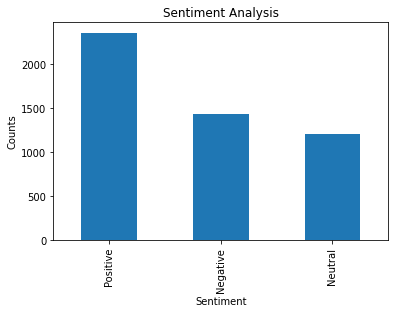

In [13]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
clean_tweets['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

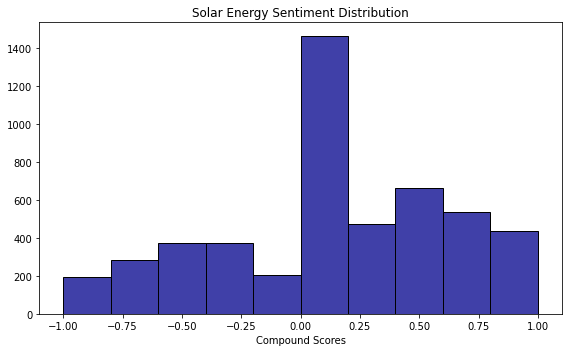

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(clean_tweets, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Solar Energy Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

In [18]:
features = clean_tweets.iloc[:, 0].values
labels = clean_tweets.iloc[:, -1].values

In [19]:
# Clean the text data by preprocessing it with regular expressions. 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters.
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters as a result of removing the special characters.
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start.
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substitute multiple spaces with a single space.
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Remove prefixed 'b'.
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convert text to Lowercase.
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [23]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [24]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200, random_state=0)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [25]:
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.6853146853146853


In [26]:
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

    Negative       0.67      0.53      0.59       278
     Neutral       0.65      0.65      0.65       253
    Positive       0.71      0.80      0.75       470

    accuracy                           0.69      1001
   macro avg       0.68      0.66      0.66      1001
weighted avg       0.68      0.69      0.68      1001



In [27]:
# Create model object. 
model_lr = LogisticRegression(max_iter=150)
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [28]:
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.7052947052947053


In [29]:
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

    Negative       0.64      0.62      0.63       278
     Neutral       0.73      0.58      0.65       253
    Positive       0.73      0.83      0.78       470

    accuracy                           0.71      1001
   macro avg       0.70      0.67      0.68      1001
weighted avg       0.70      0.71      0.70      1001



In [30]:
# Create model object. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Train the model on the training data.
model_kn.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [31]:
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.31868131868131866


In [32]:
print(classification_report(y_test_data, predictions_kn))

              precision    recall  f1-score   support

    Negative       0.67      0.11      0.19       278
     Neutral       0.27      0.99      0.43       253
    Positive       1.00      0.08      0.15       470

    accuracy                           0.32      1001
   macro avg       0.65      0.39      0.25      1001
weighted avg       0.72      0.32      0.23      1001



In [33]:
# Create model object. 
model_sv = SVC()
# Train the model on the training data.
model_sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = model_sv.predict(x_test_data)

In [34]:
sv = accuracy_score(y_test_data, predictions_sv)
print(sv)

0.6783216783216783


,Model,Accuracy_score
1,Logistic Regression,0.705295
0,Random Forest,0.685315
3,Support Vector Machine,0.678322
2,KNeighbours,0.318681


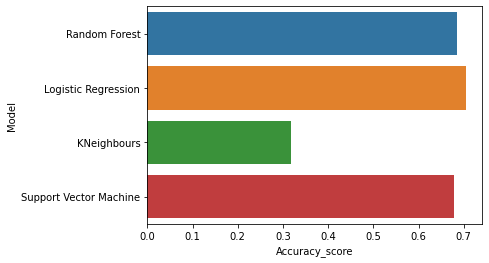

In [35]:
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'KNeighbours', 'Support Vector Machine'],
    'Accuracy_score' :[rf, lr, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)